<a href="https://colab.research.google.com/github/MT121201/Binary-Classification_of_Machine_Failures/blob/main/Machine_Failures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/MT121201/Binary-Classification_of_Machine_Failures

Cloning into 'Binary-Classification_of_Machine_Failures'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 8), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (24/24), 6.81 MiB | 5.04 MiB/s, done.


#Import Libs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
import math

# Load Data

In [3]:
train_df = pd.read_csv('/content/Binary-Classification_of_Machine_Failures/train.csv')
test_df = pd.read_csv('/content/Binary-Classification_of_Machine_Failures/test.csv')
sub=pd.read_csv('/content/Binary-Classification_of_Machine_Failures/sample_submission.csv')
train_df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


#Exploring Data

In [4]:
Df = [train_df, test_df]
names = ['Training Data','Test Data']
print('Data Information')
for df,name in zip(Df,names):
    print(name)
    print(df.info())
    print('--'*30)

Data Information
Training Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       136429 non-null  int64  
 1   Product ID               136429 non-null  object 
 2   Type                     136429 non-null  object 
 3   Air temperature [K]      136429 non-null  float64
 4   Process temperature [K]  136429 non-null  float64
 5   Rotational speed [rpm]   136429 non-null  int64  
 6   Torque [Nm]              136429 non-null  float64
 7   Tool wear [min]          136429 non-null  int64  
 8   Machine failure          136429 non-null  int64  
 9   TWF                      136429 non-null  int64  
 10  HDF                      136429 non-null  int64  
 11  PWF                      136429 non-null  int64  
 12  OSF                      136429 non-null  int64  
 13  RNF                      136

In [5]:
# Drop ID
train_df.drop('id', axis = 1, inplace = True)
test_df.drop('id', axis = 1, inplace = True)

In [6]:
desc = train_df.describe().transpose()
desc = desc.style.background_gradient()
desc

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],136429.000000,299.862776,1.862247,295.300000,298.300000,300.000000,301.200000,304.400000
Process temperature [K],136429.000000,309.941070,1.385173,305.800000,308.700000,310.000000,310.900000,313.800000
Rotational speed [rpm],136429.000000,1520.331110,138.736632,1181.000000,1432.000000,1493.000000,1580.000000,2886.000000
Torque [Nm],136429.000000,40.348643,8.502229,3.800000,34.600000,40.400000,46.100000,76.600000
Tool wear [min],136429.000000,104.408901,63.965040,0.000000,48.000000,106.000000,159.000000,253.000000
Machine failure,136429.000000,0.015744,0.124486,0.000000,0.000000,0.000000,0.000000,1.000000
TWF,136429.000000,0.001554,0.039389,0.000000,0.000000,0.000000,0.000000,1.000000
HDF,136429.000000,0.005160,0.071649,0.000000,0.000000,0.000000,0.000000,1.000000
PWF,136429.000000,0.002397,0.048899,0.000000,0.000000,0.000000,0.000000,1.000000
OSF,136429.000000,0.003958,0.062789,0.000000,0.000000,0.000000,0.000000,1.000000


##Check bias

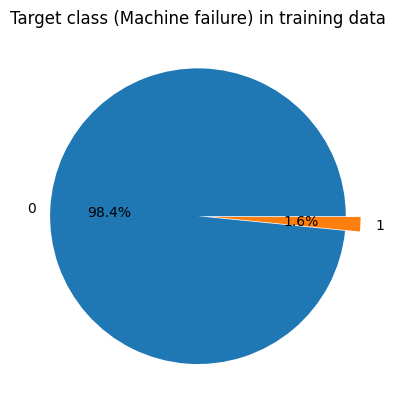

In [7]:
# Check Infomation Bias in Train data and Test data
pie = train_df['Machine failure'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',shadow=False)
pie.set_title('Target class (Machine failure) in training data')
pie.set_ylabel('')
plt.show(pie)
# Strong imbalance

## Relationship between the input and target variables

<Axes: xlabel='Machine failure', ylabel='Tool wear [min]'>

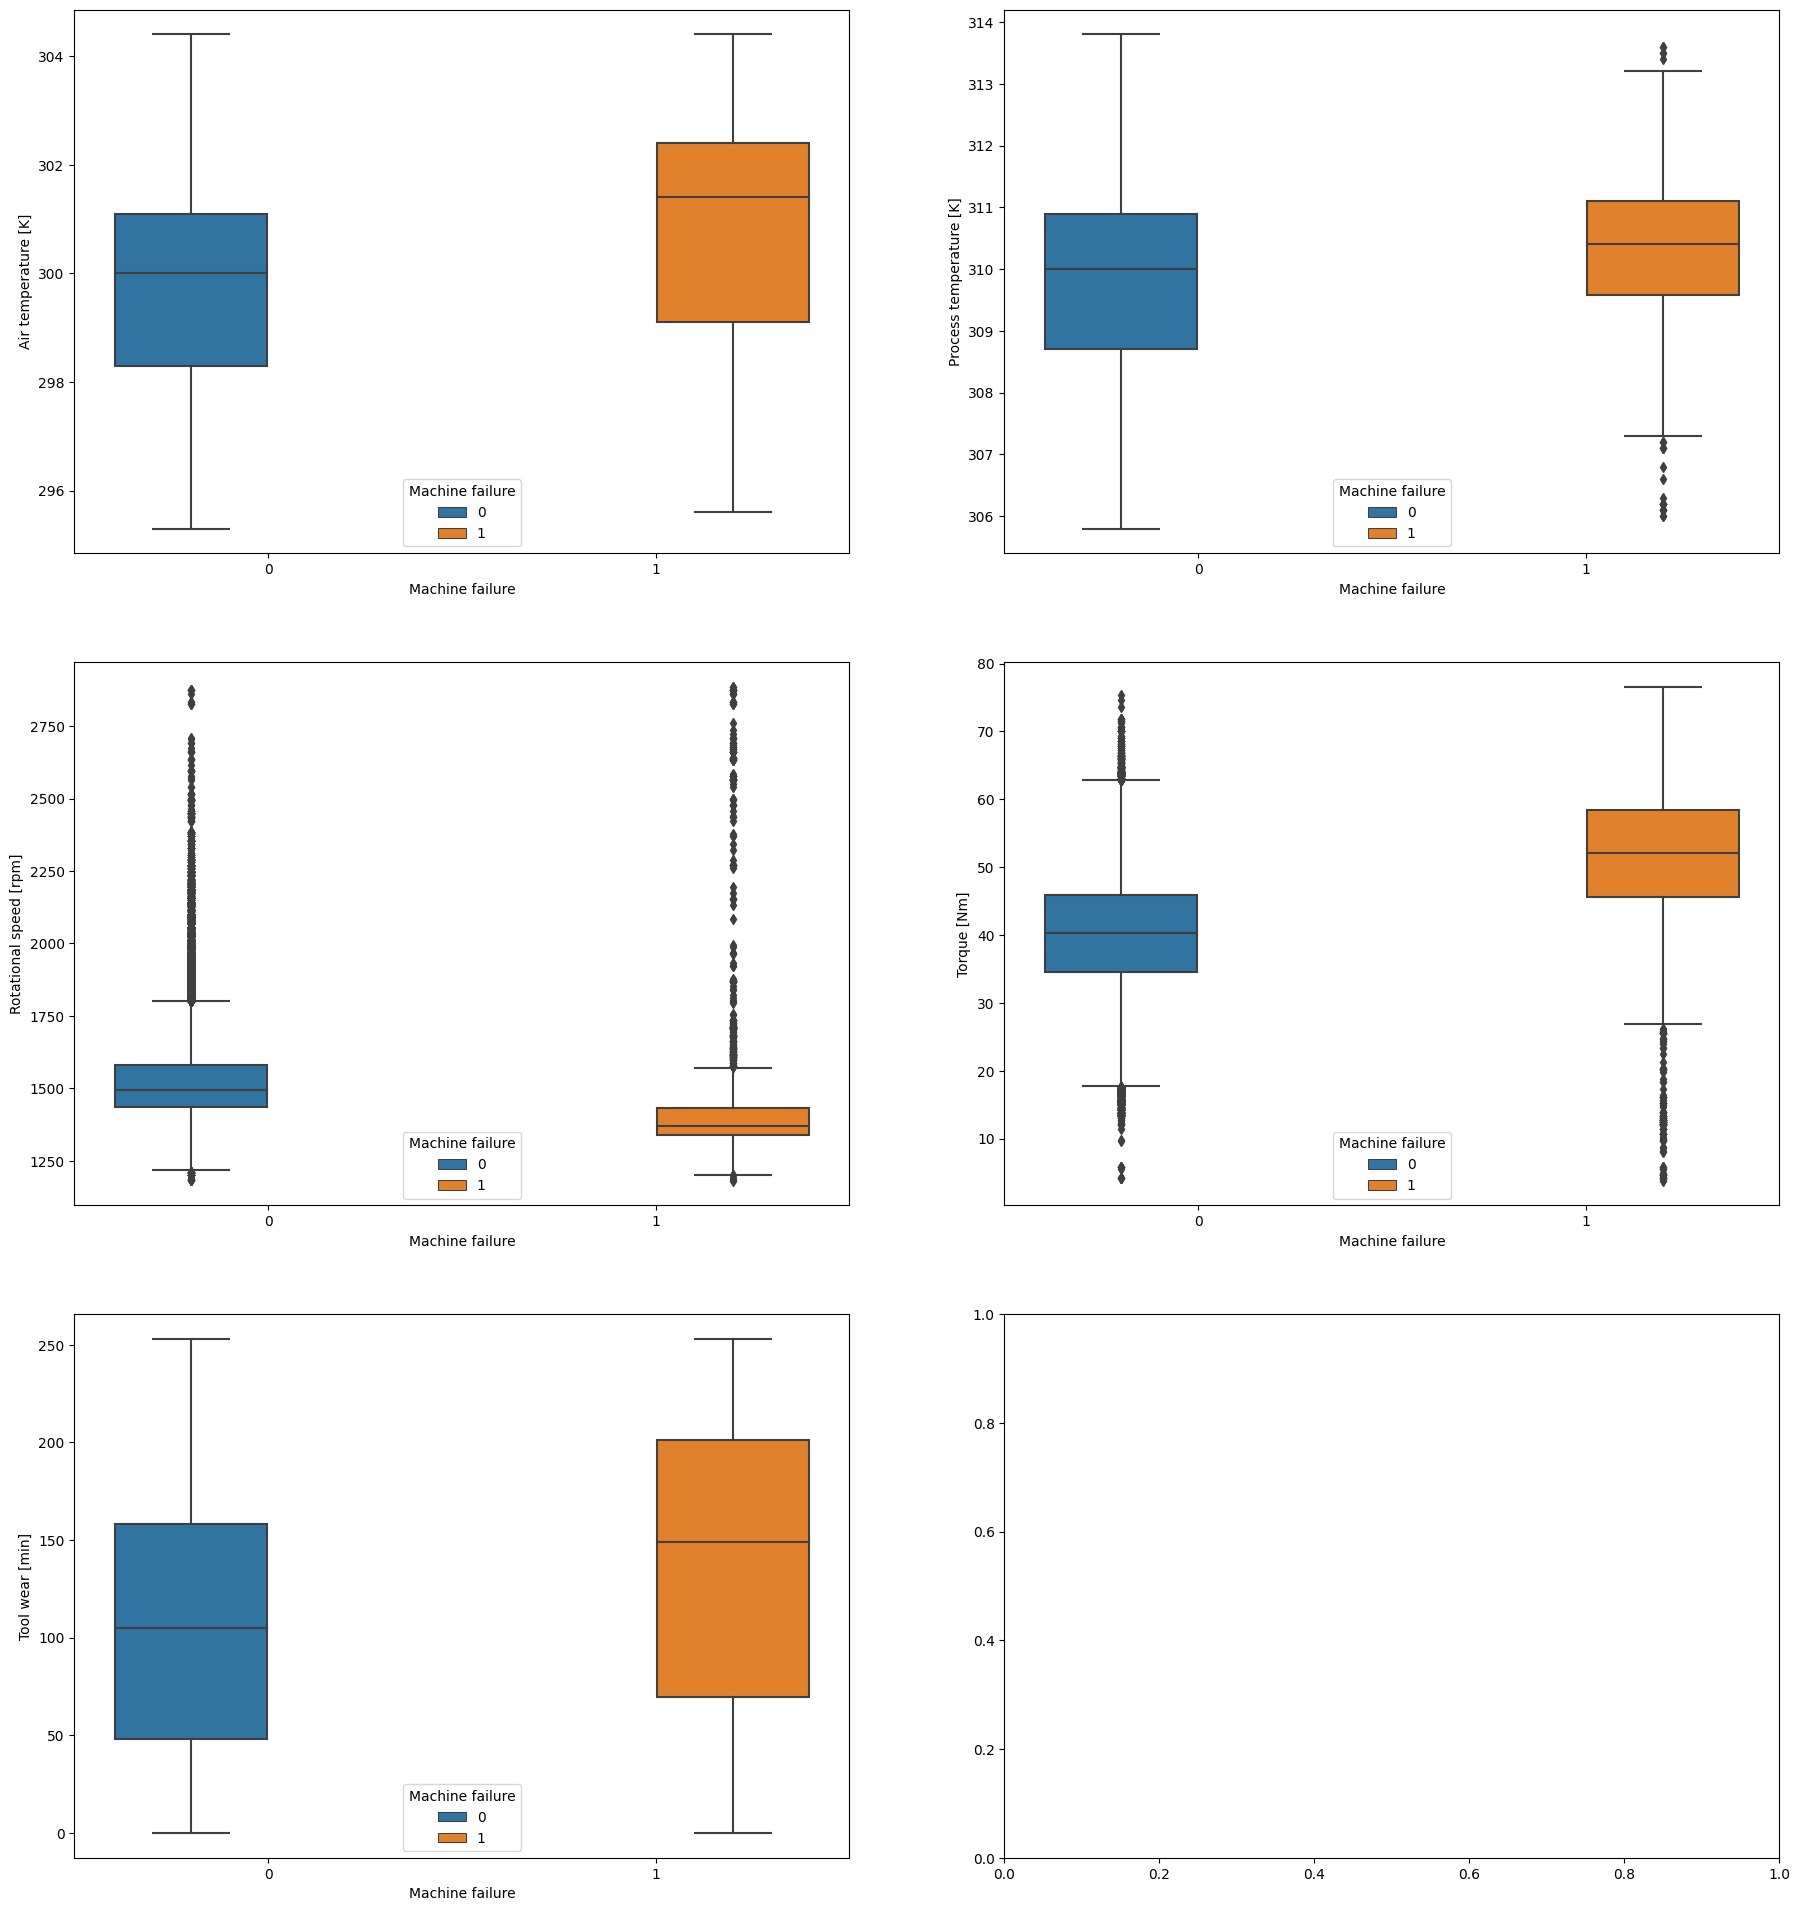

In [8]:
fig, axes = plt.subplots(3, 2, figsize = (22, 24))

sns.boxplot(ax = axes[0, 0], x = 'Machine failure', y = 'Air temperature [K]', hue = 'Machine failure', data = train_df)
sns.boxplot(ax = axes[0, 1], x = 'Machine failure', y = 'Process temperature [K]', hue = 'Machine failure', data = train_df)
sns.boxplot(ax = axes[1, 0], x = 'Machine failure', y = 'Rotational speed [rpm]', hue = 'Machine failure', data = train_df)
sns.boxplot(ax = axes[1, 1], x = 'Machine failure', y = 'Torque [Nm]', hue = 'Machine failure', data = train_df)
sns.boxplot(ax = axes[2, 0], x = 'Machine failure', y = 'Tool wear [min]', hue = 'Machine failure', data = train_df)

From the above boxplots, we see the following:

-The median Air temperature [K] is higher when machine failure is 1.\
-The median of Torque [Nm] is higher when machine failure is 1.\
-The median of Rotational speed [rpm] is higher when machine failure is 0.\
-The median of Tool wear [min] is higher when machine failure is 1.

##Linear Correlation between the features

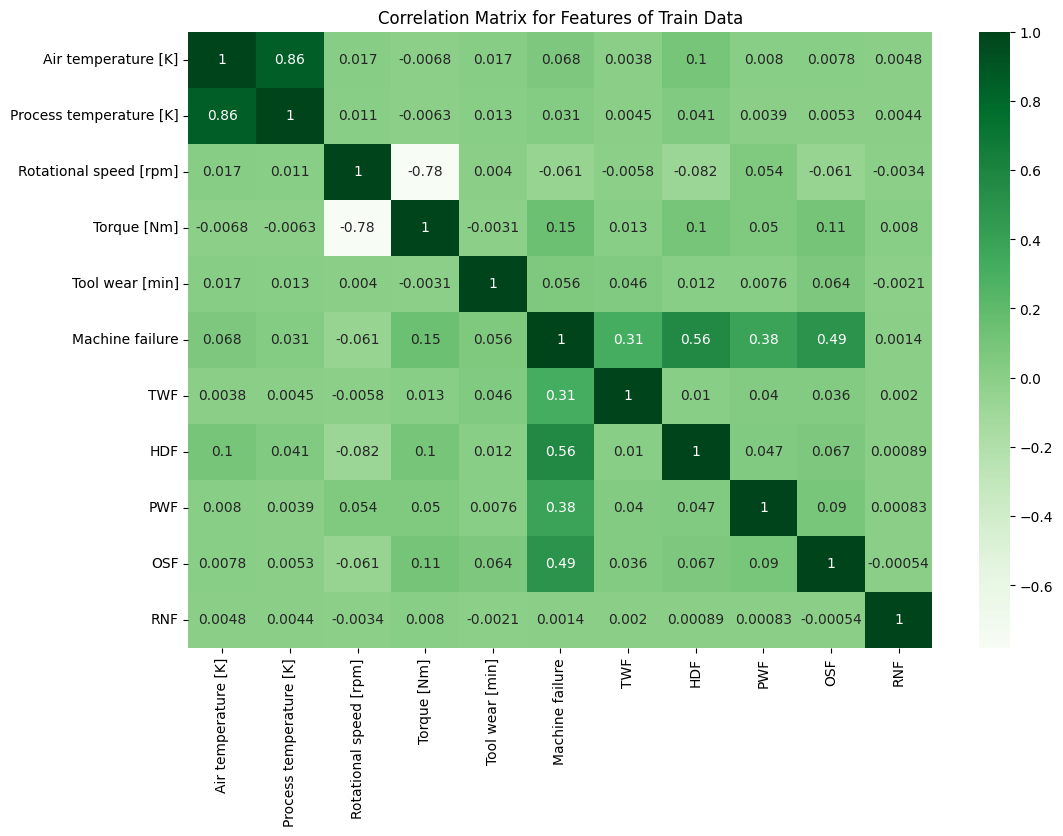

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(data=train_df.drop(['Product ID', 'Type'],axis=1).corr(),annot=True,cmap='Greens')
plt.title('Correlation Matrix for Features of Train Data');
plt.show()

##Feature Distributions for train & test data

In [10]:
train_df.drop('Machine failure',axis=1).columns

Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

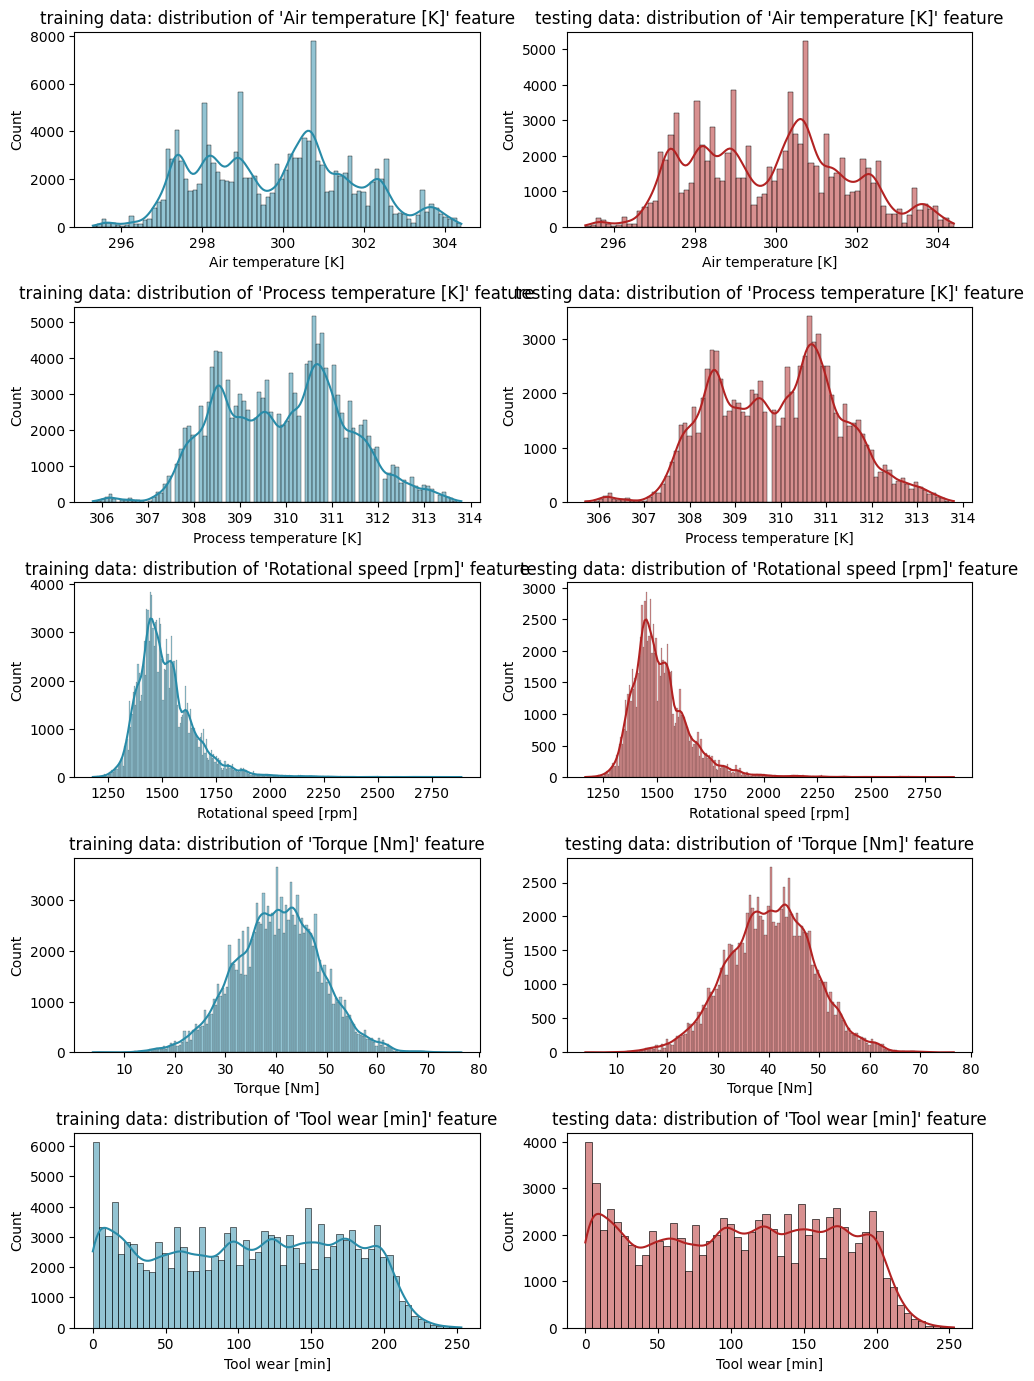

In [12]:
plt.figure(figsize=(10,30))
i = 1
for col in train_df.drop('Machine failure',axis=1).columns[2:7]:
    plt.subplot(11,2,i)
    sns.histplot(x=train_df[col],color='#288BA8',kde=True,lw=1)
    plt.title("training data: distribution of '{}' feature".format(col));

    plt.subplot(11,2,i+1)
    sns.histplot(x=test_df[col],color='#B22222',kde=True,lw=1)
    plt.title("testing data: distribution of '{}' feature".format(col));
    i+=2
plt.tight_layout()

In [ ]:
# Another useful method

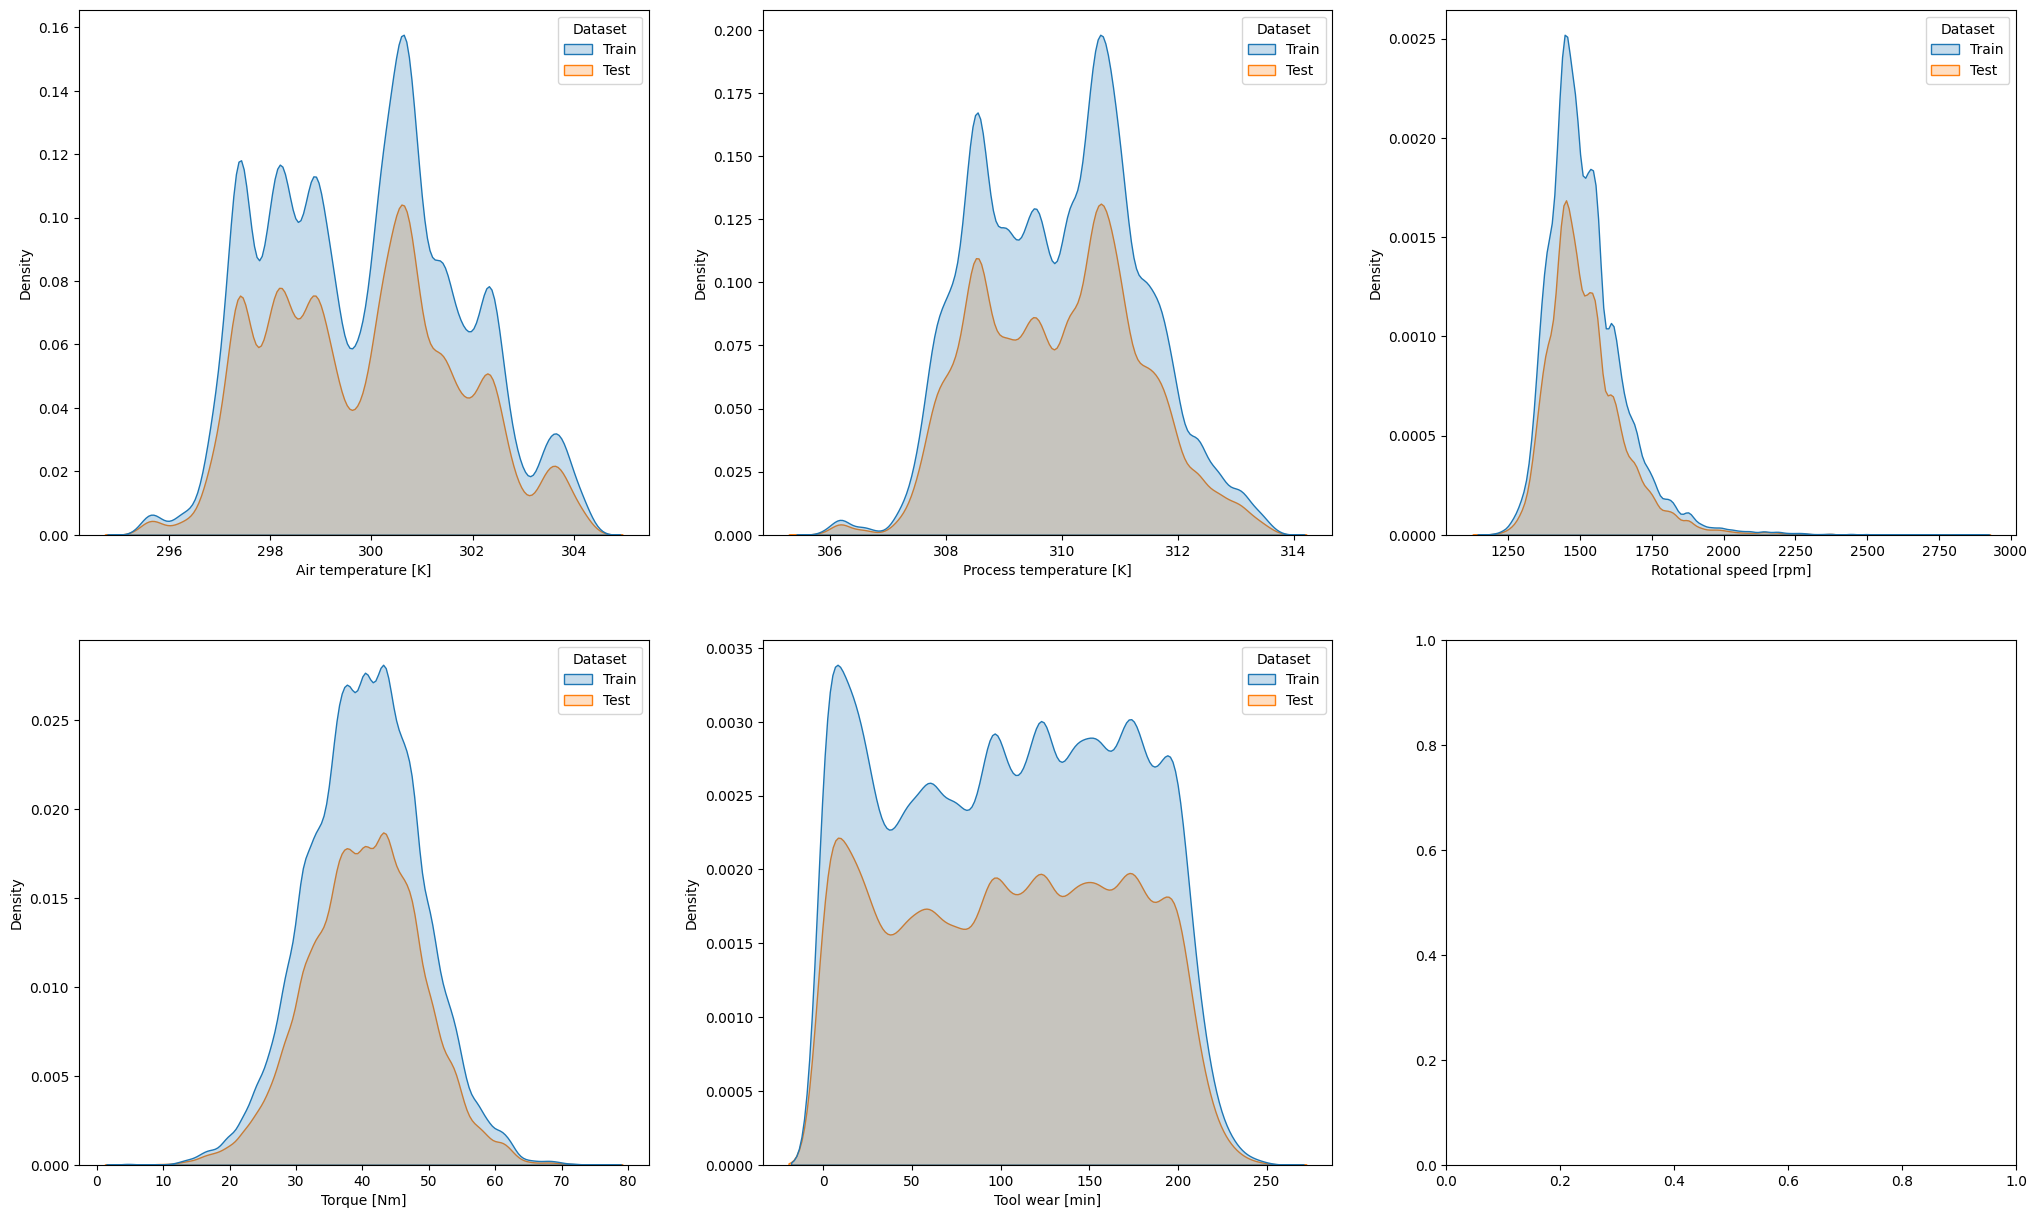

In [13]:
train_vis = train_df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].copy()
test_vis = test_df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']].copy()

train_vis['Dataset'] = 'Train'
test_vis['Dataset'] = 'Test'
data_tot = pd.concat([train_vis, test_vis], axis = 0).reset_index(drop = True)

fig, axes = plt.subplots(2, 3, figsize = (25, 15))

sns.kdeplot(ax = axes[0, 0], x = 'Air temperature [K]', hue = 'Dataset', data = data_tot, fill = True)
sns.kdeplot(ax = axes[0, 1], x = 'Process temperature [K]', hue = 'Dataset', data = data_tot, fill = True)
sns.kdeplot(ax = axes[0, 2], x = 'Rotational speed [rpm]', hue = 'Dataset', data = data_tot, fill = True)
sns.kdeplot(ax = axes[1, 0], x = 'Torque [Nm]', hue = 'Dataset', data = data_tot, fill = True)
sns.kdeplot(ax = axes[1, 1], x = 'Tool wear [min]', hue = 'Dataset', data = data_tot, fill = True);

From the above plots, we see that the distributions of the continuous features are very similar in the train and test datasets.

In [14]:
print('There are', train_df.shape[0], 'observations in the train dataset')
print('There are', train_df.drop(columns = [ 'Machine failure'], axis = 1).drop_duplicates().shape[0], 'unique observations in the train dataset')
print('There are', test_df.shape[0], 'observations in the test dataset')
print('There are', test_df.drop_duplicates().shape[0], 'unique observations in the test dataset')

There are 136429 observations in the train dataset
There are 135274 unique observations in the train dataset
There are 90954 observations in the test dataset
There are 90431 unique observations in the test dataset


In [15]:
to_consider = train_df.drop(columns = [ 'Machine failure'], axis = 1).columns.tolist()

train_dup = train_df.drop(columns = [ 'Machine failure'], axis = 1).drop_duplicates()
test_dup = test_df.drop_duplicates()
duplicates = pd.merge(train_dup, test_dup, on = to_consider)

print('There are', duplicates.shape[0], 'rows that appear in the train and test datasets.\n')

There are 1021 rows that appear in the train and test datasets.



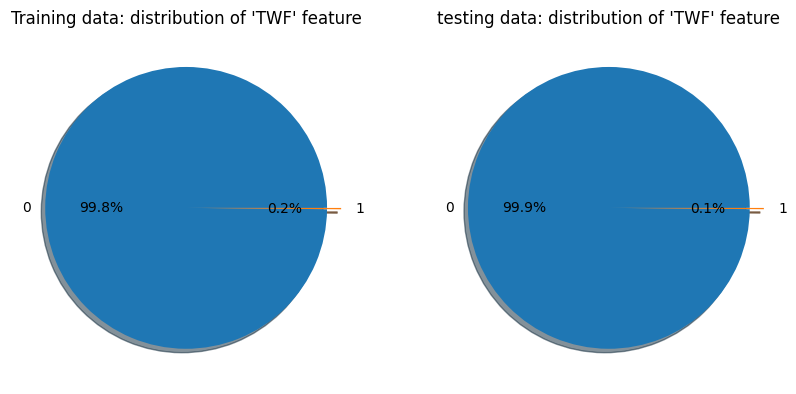

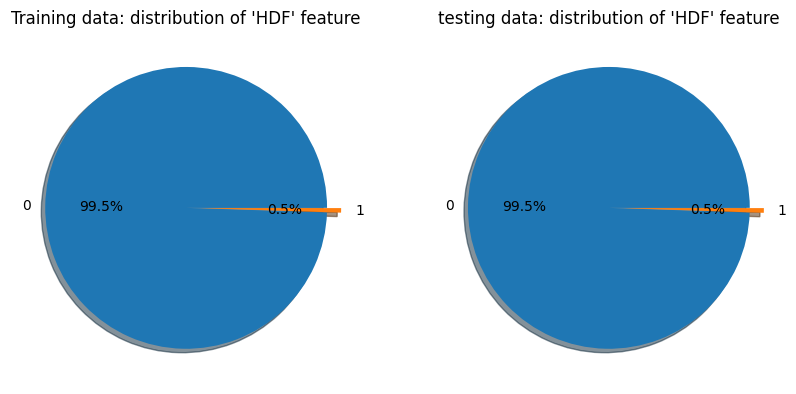

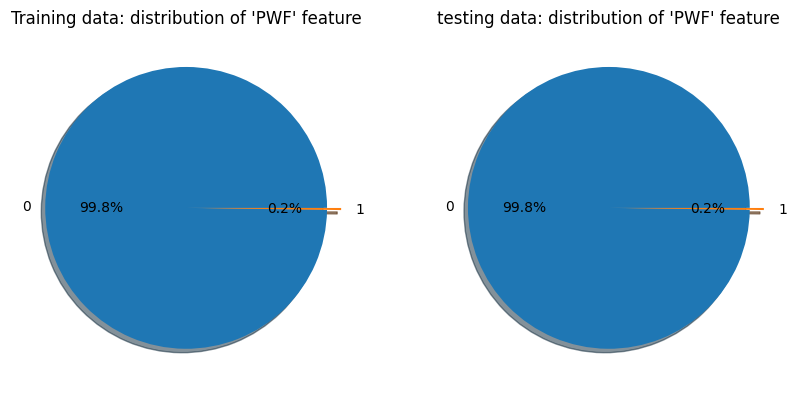

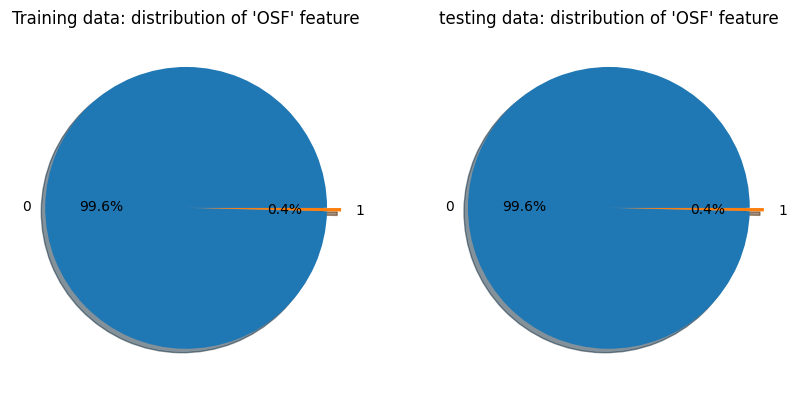

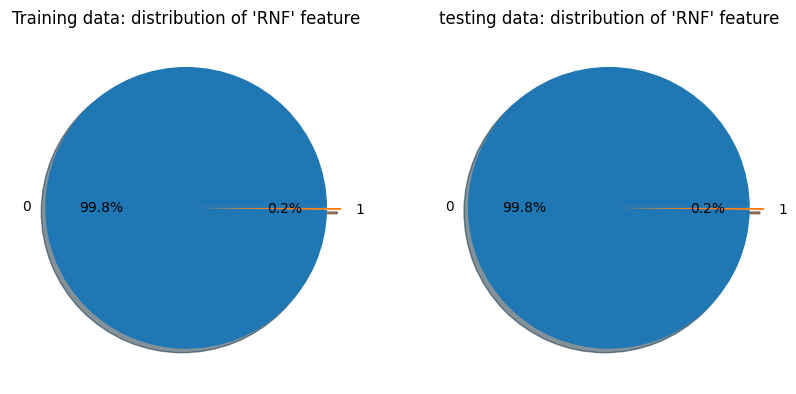

<Figure size 640x480 with 0 Axes>

In [16]:
i = 1
for col in train_df.drop('Machine failure',axis=1).columns[7:]:
    f,ax=plt.subplots(1,2,figsize=(10,15))
    train_df[col].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
    ax[0].set_title("Training data: distribution of '{}' feature".format(col))
    ax[0].set_ylabel('')
    test_df[col].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
    ax[1].set_title("testing data: distribution of '{}' feature".format(col))
    ax[1].set_ylabel('')
    plt.show()

plt.tight_layout()

#Feature Engineering

##Standardization for numerical labels : Numeric Scaling
We have intotal 5 numerical columns with different scale range of the values,
So we will scale this numeric features between [0,1]

In [18]:
from sklearn.preprocessing import MinMaxScaler

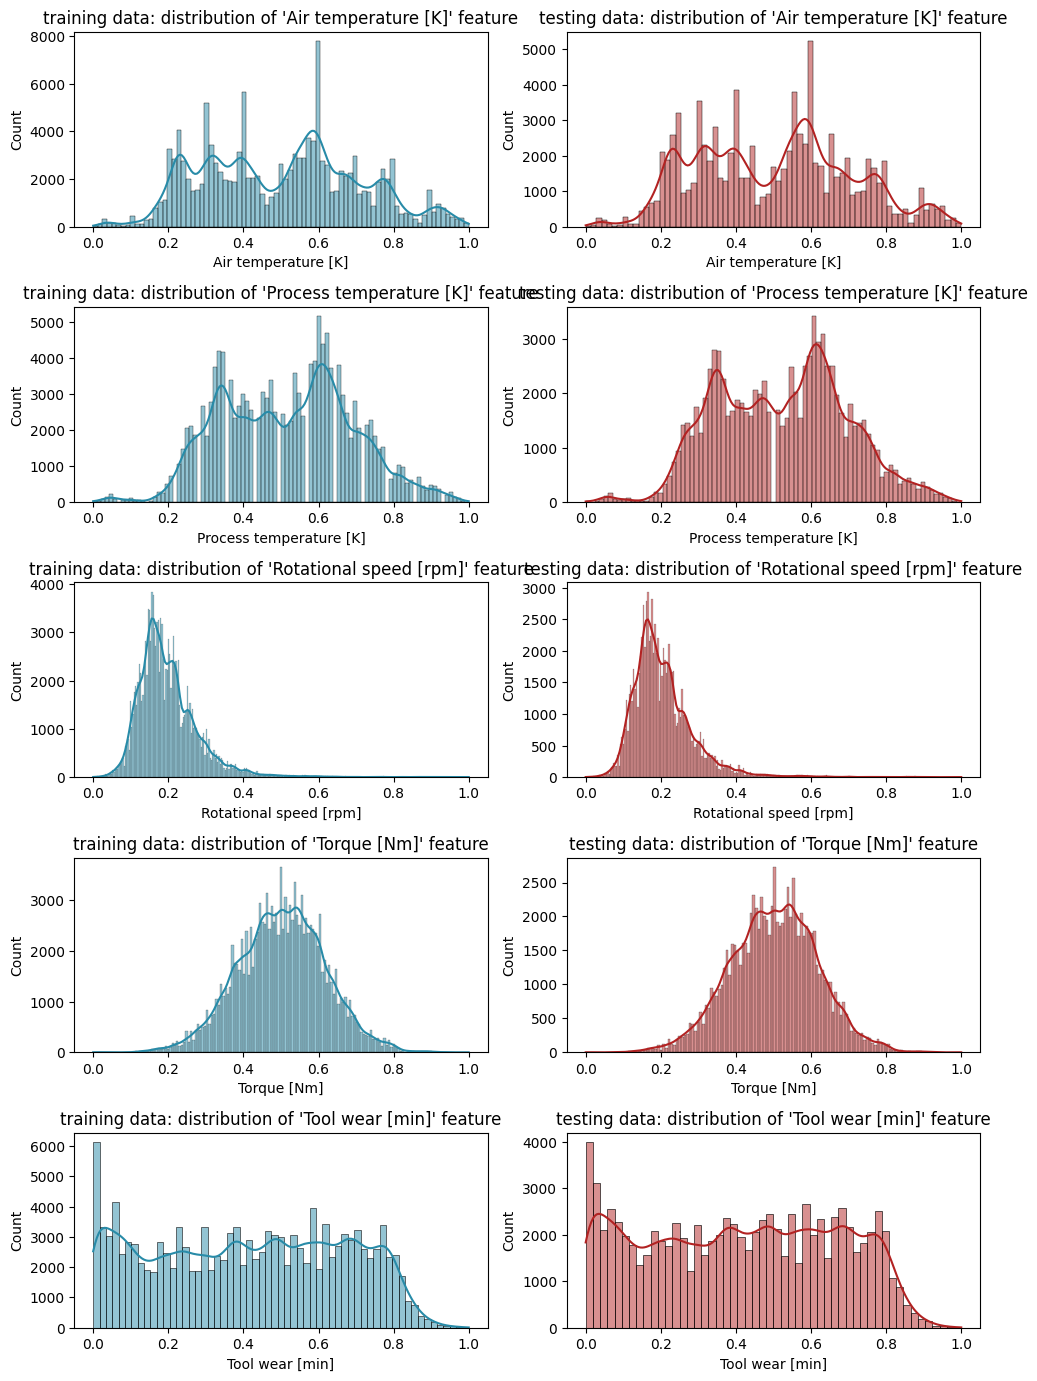

In [19]:
train_df[train_df.drop('Machine failure',axis=1).columns[2:7]] = MinMaxScaler().fit_transform(train_df[train_df.drop('Machine failure',axis=1).columns[2:7]])
test_df[test_df.columns[2:7]] = MinMaxScaler().fit_transform(test_df[test_df.columns[2:7]])

plt.figure(figsize=(10,30))
i = 1
for col in train_df.drop('Machine failure',axis=1).columns[2:7]:
    plt.subplot(11,2,i)
    sns.histplot(x=train_df[col],color='#288BA8',kde=True,lw=1)
    plt.title("training data: distribution of '{}' feature".format(col));

    plt.subplot(11,2,i+1)
    sns.histplot(x=test_df[col],color='#B22222',kde=True,lw=1)
    plt.title("testing data: distribution of '{}' feature".format(col));
    i+=2
plt.tight_layout()

##Feature Generation

In [20]:
def feat(df):
    df['Power'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']
    # Calculate temperature difference
    df['TemperatureDifference'] = df['Process temperature [K]'] - df['Air temperature [K]']
    # Calculate temperature variability
    df['TemperatureVariability'] = df[['Air temperature [K]', 'Process temperature [K]']].std(axis=1)
    # Calculate temperature ratio
    df['TemperatureRatio'] = df['Process temperature [K]'] / df['Air temperature [K]']
    # Calculate tool wear rate
    df['ToolWearRate'] = df['Tool wear [min]'] / (df['Tool wear [min]'].max())
    # Calculate temperature change rate
    df['TemperatureChangeRate'] = df['TemperatureDifference'] / df['Tool wear [min]']
    # Doing this to remove outlier of infinity which is due to zero present in toolwearmin column.
    df['TemperatureChangeRate'] = np.where(df['TemperatureChangeRate']== float('inf'),1, df['TemperatureChangeRate'])
    # Calculate the total failure
    df['TotalFailures'] = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']].sum(axis=1)
    # Torque wear ratio and product as both are dependent variables and imp for machine working
    df["TorqueWearRatio"] = df['Torque [Nm]'] / (df['Tool wear [min]'] + 0.0001)
    df["TorqueWearProduct"] = df['Torque [Nm]'] * df['Tool wear [min]']
    # Recreating the product id column
    df["Product_id_num"] = pd.to_numeric(df["Product ID"].str.slice(start=1))
    # Feature scaling for some features to make them relevant for predictions
    features_list = ['Air temperature [K]', 'Process temperature [K]','Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
    for feat in features_list:
        df[f'{feat}Squared'] = df[feat] ** 2
        df[f'{feat}Cubed'] = df[feat] ** 3
        df[f'{feat}Log'] = df[feat].apply(lambda x: math.log(x) if x > 0 else 0)

    for feat1 in features_list:
        for feat2 in features_list:
            df[f'{feat1}_{feat2}_Product'] = df[feat1] * df[feat2]
    # Lets just remove the unnecessory columns
    df.drop(['Product ID'],axis=1,inplace=True)
    # RNF column have the least correlation with the target variable and from the observation its not important while predicting also
    df.drop(['RNF'], axis =1, inplace = True)
    return df

In [21]:
train_df = feat(train_df)
test_df = feat(test_df)

In [22]:
test_df.head(3)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,...,Torque [Nm]_Air temperature [K]_Product,Torque [Nm]_Process temperature [K]_Product,Torque [Nm]_Rotational speed [rpm]_Product,Torque [Nm]_Torque [Nm]_Product,Torque [Nm]_Tool wear [min]_Product,Tool wear [min]_Air temperature [K]_Product,Tool wear [min]_Process temperature [K]_Product,Tool wear [min]_Rotational speed [rpm]_Product,Tool wear [min]_Torque [Nm]_Product,Tool wear [min]_Tool wear [min]_Product
0,L,0.769231,0.716049,0.192666,0.469780,0.237154,0,0,0,0,...,0.361369,0.336386,0.090511,0.220693,0.111410,0.182426,0.169814,0.045692,0.111410,0.056242
1,L,0.703297,0.654321,0.317229,0.343407,0.067194,0,0,0,0,...,0.241517,0.224698,0.108939,0.117928,0.023075,0.047257,0.043966,0.021316,0.023075,0.004515
2,L,0.659341,0.580247,0.207800,0.465659,0.379447,0,0,0,0,...,0.307028,0.270197,0.096764,0.216839,0.176693,0.250185,0.220173,0.078849,0.176693,0.143980


In [29]:
# Failure type still in catologies
train_df = pd.get_dummies(train_df,drop_first=True)
test_df = pd.get_dummies(test_df,drop_first=True)

In [30]:
train_df.head(3)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,...,Torque [Nm]_Rotational speed [rpm]_Product,Torque [Nm]_Torque [Nm]_Product,Torque [Nm]_Tool wear [min]_Product,Tool wear [min]_Air temperature [K]_Product,Tool wear [min]_Process temperature [K]_Product,Tool wear [min]_Rotational speed [rpm]_Product,Tool wear [min]_Torque [Nm]_Product,Tool wear [min]_Tool wear [min]_Product,Type_L,Type_M
0,0.582418,0.4750,0.243402,0.443681,0.553360,0,0,0,0,0,...,0.107993,0.196853,0.245515,0.322286,0.262846,0.134689,0.245515,0.306207,1,0
1,0.802198,0.7875,0.339003,0.347527,0.790514,0,0,0,0,0,...,0.117813,0.120775,0.274725,0.634148,0.622530,0.267987,0.274725,0.624912,0,1
2,0.439560,0.3375,0.365982,0.311813,0.098814,0,0,0,0,0,...,0.114118,0.097227,0.030812,0.043435,0.033350,0.036164,0.030812,0.009764,1,0


# Predictive Analysis

##Train data

In [31]:
train = train_df.drop(['Machine failure'], axis=1)
train = pd.DataFrame(train, columns = train_df.drop(['Machine failure'], axis=1).columns)
train

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Power,...,Torque [Nm]_Rotational speed [rpm]_Product,Torque [Nm]_Torque [Nm]_Product,Torque [Nm]_Tool wear [min]_Product,Tool wear [min]_Air temperature [K]_Product,Tool wear [min]_Process temperature [K]_Product,Tool wear [min]_Rotational speed [rpm]_Product,Tool wear [min]_Torque [Nm]_Product,Tool wear [min]_Tool wear [min]_Product,Type_L,Type_M
0,0.582418,0.4750,0.243402,0.443681,0.553360,0,0,0,0,0.107993,...,0.107993,0.196853,0.245515,0.322286,0.262846,0.134689,0.245515,0.306207,1,0
1,0.802198,0.7875,0.339003,0.347527,0.790514,0,0,0,0,0.117813,...,0.117813,0.120775,0.274725,0.634148,0.622530,0.267987,0.274725,0.624912,0,1
2,0.439560,0.3375,0.365982,0.311813,0.098814,0,0,0,0,0.114118,...,0.114118,0.097227,0.030812,0.043435,0.033350,0.036164,0.030812,0.009764,1,0
3,0.626374,0.6375,0.201173,0.556319,0.778656,0,0,0,0,0.111916,...,0.111916,0.309490,0.433181,0.487730,0.496393,0.156645,0.433181,0.606305,1,0
4,0.296703,0.4000,0.269795,0.434066,0.134387,0,0,0,0,0.117109,...,0.117109,0.188413,0.058333,0.039873,0.053755,0.036257,0.058333,0.018060,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.527473,0.7000,0.204692,0.462912,0.830040,0,0,0,0,0.094754,...,0.094754,0.214288,0.384235,0.437823,0.581028,0.169903,0.384235,0.688966,0,1
136425,0.241758,0.3375,0.156012,0.622253,0.007905,0,0,0,0,0.097079,...,0.097079,0.387198,0.004919,0.001911,0.002668,0.001233,0.004919,0.000062,0,0
136426,0.571429,0.7500,0.201173,0.476648,0.845850,0,0,0,0,0.095889,...,0.095889,0.227194,0.403173,0.483343,0.634387,0.170162,0.403173,0.715462,1,0
136427,0.703297,0.6375,0.156012,0.583791,0.166008,0,0,0,0,0.091078,...,0.091078,0.340812,0.096914,0.116753,0.105830,0.025899,0.096914,0.027559,1,0


##Test data

In [32]:
test = test_df
test

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,Power,...,Torque [Nm]_Rotational speed [rpm]_Product,Torque [Nm]_Torque [Nm]_Product,Torque [Nm]_Tool wear [min]_Product,Tool wear [min]_Air temperature [K]_Product,Tool wear [min]_Process temperature [K]_Product,Tool wear [min]_Rotational speed [rpm]_Product,Tool wear [min]_Torque [Nm]_Product,Tool wear [min]_Tool wear [min]_Product,Type_L,Type_M
0,0.769231,0.716049,0.192666,0.469780,0.237154,0,0,0,0,0.090511,...,0.090511,0.220693,0.111410,0.182426,0.169814,0.045692,0.111410,0.056242,1,0
1,0.703297,0.654321,0.317229,0.343407,0.067194,0,0,0,0,0.108939,...,0.108939,0.117928,0.023075,0.047257,0.043966,0.021316,0.023075,0.004515,1,0
2,0.659341,0.580247,0.207800,0.465659,0.379447,0,0,0,0,0.096764,...,0.096764,0.216839,0.176693,0.250185,0.220173,0.078849,0.176693,0.143980,1,0
3,0.527473,0.481481,0.181024,0.601648,0.019763,0,0,0,0,0.108913,...,0.108913,0.361981,0.011890,0.010424,0.009515,0.003578,0.011890,0.000391,0,1
4,0.890110,0.814815,0.201979,0.515110,0.450593,0,0,0,0,0.104041,...,0.104041,0.265338,0.232105,0.401077,0.367150,0.091010,0.232105,0.203034,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90949,0.769231,0.703704,0.183935,0.502747,0.059289,0,0,0,0,0.092473,...,0.092473,0.252755,0.029807,0.045607,0.041722,0.010905,0.029807,0.003515,1,0
90950,0.285714,0.506173,0.217695,0.412088,0.122530,0,0,0,0,0.089709,...,0.089709,0.169816,0.050493,0.035008,0.062021,0.026674,0.050493,0.015014,1,0
90951,0.032967,0.061728,0.193830,0.516484,0.739130,0,0,0,0,0.100110,...,0.100110,0.266755,0.381749,0.024367,0.045625,0.143266,0.381749,0.546314,1,0
90952,0.307692,0.259259,0.213038,0.501374,0.272727,0,0,0,0,0.106812,...,0.106812,0.251376,0.136738,0.083916,0.070707,0.058101,0.136738,0.074380,1,0


##Rename the columns
There are some problems with the column names in the dataframes, rename for simplity

In [33]:
train.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'TWF',
       'HDF', 'PWF', 'OSF', 'Power', 'TemperatureDifference',
       'TemperatureVariability', 'TemperatureRatio', 'ToolWearRate',
       'TemperatureChangeRate', 'TotalFailures', 'TorqueWearRatio',
       'TorqueWearProduct', 'Product_id_num', 'Air temperature [K]Squared',
       'Air temperature [K]Cubed', 'Air temperature [K]Log',
       'Process temperature [K]Squared', 'Process temperature [K]Cubed',
       'Process temperature [K]Log', 'Rotational speed [rpm]Squared',
       'Rotational speed [rpm]Cubed', 'Rotational speed [rpm]Log',
       'Torque [Nm]Squared', 'Torque [Nm]Cubed', 'Torque [Nm]Log',
       'Tool wear [min]Squared', 'Tool wear [min]Cubed', 'Tool wear [min]Log',
       'Air temperature [K]_Air temperature [K]_Product',
       'Air temperature [K]_Process temperature [K]_Product',
       'Air temperature [K]_Rotational speed [rpm]_Produc

In [34]:
for df in [train, test]:
    df.columns = df.columns.str.replace('[\[\]]', '', regex=True)

In [35]:
train.columns

Index(['Air temperature K', 'Process temperature K', 'Rotational speed rpm',
       'Torque Nm', 'Tool wear min', 'TWF', 'HDF', 'PWF', 'OSF', 'Power',
       'TemperatureDifference', 'TemperatureVariability', 'TemperatureRatio',
       'ToolWearRate', 'TemperatureChangeRate', 'TotalFailures',
       'TorqueWearRatio', 'TorqueWearProduct', 'Product_id_num',
       'Air temperature KSquared', 'Air temperature KCubed',
       'Air temperature KLog', 'Process temperature KSquared',
       'Process temperature KCubed', 'Process temperature KLog',
       'Rotational speed rpmSquared', 'Rotational speed rpmCubed',
       'Rotational speed rpmLog', 'Torque NmSquared', 'Torque NmCubed',
       'Torque NmLog', 'Tool wear minSquared', 'Tool wear minCubed',
       'Tool wear minLog', 'Air temperature K_Air temperature K_Product',
       'Air temperature K_Process temperature K_Product',
       'Air temperature K_Rotational speed rpm_Product',
       'Air temperature K_Torque Nm_Product',
       'A

##Devide the data

In [36]:
X = train
y = train_df['Machine failure']
X_test = test

#LGBMClassifier
[LightGBM Classifier in Python](https://www.kaggle.com/code/prashant111/lightgbm-classifier-in-python)

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel and GPU learning.
- Capable of handling large-scale data.
- **Light GBM can handle the large size of data and takes lower memory to run.**

Another reason why Light GBM is so popular is because it focuses on accuracy of results. LGBM also supports GPU learning and thus data scientists are widely using LGBM for data science application development.

It is not advisable to use LGBM on small datasets. Light GBM is sensitive to overfitting and can easily overfit small data.

In [37]:
from lightgbm import LGBMClassifier, early_stopping
from sklearn.model_selection import train_test_split
from itertools import product
from sklearn.metrics import roc_auc_score

In [38]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

##Optuna: Hyperparameter tunning
[LGBM parameter](https://github.com/microsoft/LightGBM/blob/master/docs/Parameters.rst)

In [39]:
!pip install optuna -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 7.3 MB/s eta 0:00:00


In [ ]:
import optuna
def objective(trial):

    n_leaves = trial.suggest_int('num_leaves', 31,100)
    max_depth = trial.suggest_int("max_depth", -1,10)
    n_estimators = trial.suggest_int("n_estimators", 10,2000)
    r_alpha = trial.suggest_int("reg_alpha", 0.0, 0.1)
    r_lambda = trial.suggest_int("reg_lambda", 0.0, 0.1)
    l_rate = trial.suggest_loguniform('learning_rate', 0.001, 0.1)
    subsample =  trial.suggest_uniform('subsample', 0.5, 1.0)
    lambda_l1 = trial.suggest_int("lambda_l1", 0.0, 4)
    lambda_l2 = trial.suggest_int("lambda_l2", 0.0, 4)
    feature_fraction =  trial.suggest_uniform('feature_fraction', 0.5, 1.0)

    lgb = LGBMClassifier(
            num_leaves =n_leaves,
            max_depth=max_depth,
            n_estimators=n_estimators,
            reg_alpha = r_alpha,
            reg_lambda = r_lambda,
            learning_rate = l_rate,
            subsample = subsample,
            lambda_l1 = lambda_l1,
            lambda_l2 = lambda_l2,
            feature_fraction = feature_fraction
        )

    lgb.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=20, verbose=False)

    y_pred_proba = lgb.predict_proba(X_val)[:, 1]
    roc_auc = roc_auc_score(y_val, y_pred_proba)

    return roc_auc

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

In [ ]:
trial = study.best_trial
print('Auc: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

##Fit(X,y)

In [ ]:
lgb_clf = LGBMClassifier(**trial.params)

lgb_clf.fit(X,y)

# Predicting the probabilities of the classes using the model
pred = lgb_clf.predict_proba(X_test)
pred[:,1]

## Predicted values

In [ ]:
df = pd.DataFrame(pred[:,1])
df.columns = ['Machine failure']
# Creating the Data for the submission to competition
sub.drop('Machine failure',axis=1,inplace=True)
sub['Machine failure']=df['Machine failure'].copy()
sub.to_csv('sub_LGBMc.csv', index=False)
sub

##Model Feature Importance

In [ ]:
from lightgbm import plot_importance
lgb_clf

In [ ]:
plot_importance(lgb_clf, figsize=(10, 9));

#Recreating the data for modelling
According to above feature importance analysis,
Some of the columns like ['Type_M','Type_L'] etc, seems to be less relevant while fitting the model,
so lets drop it try to remodel to predict the test data

In [ ]:
X.columns

In [ ]:
cols = ['Type_M','Type_L','Tool wear min_Air temperature K_Product','Process temperature KSquared','Air temperature KSquared','Torque Nm_Tool wear min_Product','Rotational speed rpm_Process temperature K_Product','Tool wear min_Process temperature K_Product','Tool wear min_Rotational speed rpm_Product','Rotational speed rpmSquared', 'Torque Nm_Air temperature K_Product','ToolWearRate','Process temperature K_Air temperature K_Product', 'Process temperature KLog','Rotational speed rpm_Torque Nm_Product','Rotational speed rpm_Air temperature K_Product','Torque NmSquared','Air temperature KLog']
train.drop(cols, axis = 1, inplace = True)
test.drop(cols, axis = 1, inplace = True)
X = train
y = train_df['Machine failure']
X_test = test

In [ ]:
lgb_clf = LGBMClassifier(**trial.params)
lgb_clf.fit(X,y)

# Predicting the probabilities of the classes using the model
pred = lgb_clf.predict_proba(X_test)

In [ ]:
# Creting DataFrame of the predicted values
df = pd.DataFrame(pred[:,1])
df.columns = ['Machine failure']
# Creating the Data for the submission to competition
sub.drop('Machine failure',axis=1,inplace=True)
sub['Machine failure']=df['Machine failure'].copy()
sub.to_csv('sub_LGBMc_after_feature_reduction.csv', index=False)
sub